## Setting Up Data

In [1]:
!gdown --id 1gDxY1pS743Wi4_zgsFcbF8OCklMQwtS0
!mkdir data
!unzip '/content/visual_calculator_data.zip' -d '/content/data/'
!rm -r visual_calculator_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/extracted_images/min/171.jpg  
  inflating: /content/data/__MACOSX/extracted_images/min/._171.jpg  
  inflating: /content/data/extracted_images/min/64.jpg  
  inflating: /content/data/__MACOSX/extracted_images/min/._64.jpg  
  inflating: /content/data/extracted_images/min/70.jpg  
  inflating: /content/data/__MACOSX/extracted_images/min/._70.jpg  
  inflating: /content/data/extracted_images/min/58.jpg  
  inflating: /content/data/__MACOSX/extracted_images/min/._58.jpg  
  inflating: /content/data/extracted_images/min/8.jpg  
  inflating: /content/data/__MACOSX/extracted_images/min/._8.jpg  
  inflating: /content/data/extracted_images/min/198.jpg  
  inflating: /content/data/__MACOSX/extracted_images/min/._198.jpg  
  inflating: /content/data/extracted_images/min/66.jpg  
  inflating: /content/data/__MACOSX/extracted_images/min/._66.jpg  
  inflating: /content/data/extracted_images/min/72.jpg  
  inflating: /c

## Data Processing Pipeline

#### Data generators

In [2]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
import time

In [3]:
data_gen = ImageDataGenerator(shear_range=0.2,zoom_range=0.2,rescale=1./255 ,validation_split=0.2)

path_to_data = '/content/data/extracted_images/'

training_dataset = data_gen.flow_from_directory(path_to_data,(128,128),subset="training" ,color_mode='grayscale')

validation_dataset = data_gen.flow_from_directory(path_to_data,(128,128),subset="validation",color_mode='grayscale')


Found 6701 images belonging to 13 classes.
Found 1669 images belonging to 13 classes.


### Exploring Our Dataset

In [4]:
print(training_dataset.class_indices)
labels = ["divide" , "eight","five","four","min","mul","nine","one","plus","seven","six","three","two"]

{'div': 0, 'eight': 1, 'five': 2, 'four': 3, 'min': 4, 'mul': 5, 'nine': 6, 'one': 7, 'plus': 8, 'seven': 9, 'six': 10, 'three': 11, 'two': 12}


### Visualize Data

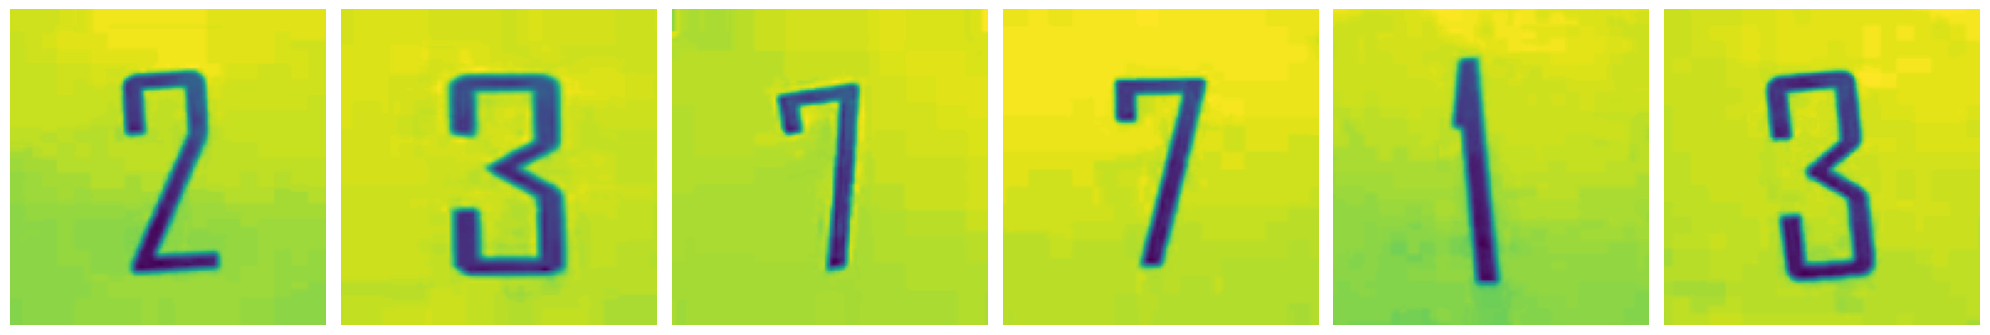

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
training_images, _ = next(training_dataset)
plotImages(training_images[:6])

## Implementing the Model

In [6]:
# initialising the CNN
visual_calculator_model = Sequential()

# convolution to extract features from images
visual_calculator_model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# max pooling to get max / largest values in feature map
# down sampling technique to get the most present features
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))

# more convolution and max pooling layers
visual_calculator_model.add(Conv2D(64, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))
visual_calculator_model.add(Conv2D(128, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))
visual_calculator_model.add(Conv2D(256, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))

# flattening is converting the data into a 1-dimensional array
visual_calculator_model.add(Flatten())
visual_calculator_model.add(Dense(units = 1024, activation = 'relu'))
visual_calculator_model.add(Dense(units = 13, activation = 'softmax'))

# compiling the CNN
visual_calculator_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# show summary of the created model
visual_calculator_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [7]:
history = visual_calculator_model.fit(training_dataset , epochs =15 ,validation_data= validation_dataset, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2) )

Epoch 1/15
210/210 [==============================] - 27s 98ms/step - loss: 0.8583 - accuracy: 0.7071 - val_loss: 0.2042 - val_accuracy: 0.9479
Epoch 2/15
210/210 [==============================] - 19s 92ms/step - loss: 0.0268 - accuracy: 0.9933 - val_loss: 0.0916 - val_accuracy: 0.9796
Epoch 3/15
210/210 [==============================] - 20s 95ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0986 - val_accuracy: 0.9826
Epoch 4/15
210/210 [==============================] - 22s 103ms/step - loss: 0.0132 - accuracy: 0.9972 - val_loss: 0.0583 - val_accuracy: 0.9898
Epoch 5/15
210/210 [==============================] - 19s 91ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0570 - val_accuracy: 0.9886
Epoch 6/15
210/210 [==============================] - 19s 92ms/step - loss: 8.7214e-04 - accuracy: 0.9997 - val_loss: 0.0810 - val_accuracy: 0.9862
Epoch 7/15
210/210 [==============================] - 20s 95ms/step - loss: 4.1316e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_

In [8]:
visual_calculator_model.save("/content/vc_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
visual_calculator_model.save_weights("/content/vc_model.hdf5")

## Testing model

Prediction - Accuracy

float32
(128, 128, 1)
(1, 128, 128, 1)
1/1 [==============================] - 1s 932ms/step
Model Predictions : nine 



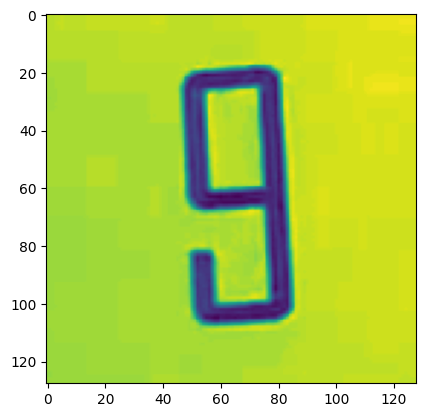

In [10]:
testing_image = image.load_img('/content/data/extracted_images/nine/10.jpg', color_mode="grayscale",target_size=(128,128))
plt.imshow(testing_image)

testing_image = image.img_to_array(testing_image)
print(testing_image.dtype)
print(testing_image.shape)

testing_image = np.expand_dims(testing_image , axis=0)
print(testing_image.shape)
prediction_result = visual_calculator_model.predict(testing_image)
print("Model Predictions :", labels[np.argmax(prediction_result)] , "\n" )

LOSS - Validation Metrices

In [11]:
history.history

{'loss': [0.858286440372467,
  0.026827260851860046,
  0.004237332381308079,
  0.01322221290320158,
  0.0020111470948904753,
  0.0008721392368897796,
  4.1315572161693126e-05],
 'accuracy': [0.7070586681365967,
  0.9932845830917358,
  0.9985076785087585,
  0.9971646070480347,
  0.999552309513092,
  0.9997015595436096,
  1.0],
 'val_loss': [0.2042054384946823,
  0.09159714728593826,
  0.09857015311717987,
  0.05825642868876457,
  0.057021476328372955,
  0.08100852370262146,
  0.07739130407571793],
 'val_accuracy': [0.9478729963302612,
  0.9796285033226013,
  0.982624351978302,
  0.989814281463623,
  0.9886159300804138,
  0.9862192869186401,
  0.9868184328079224]}

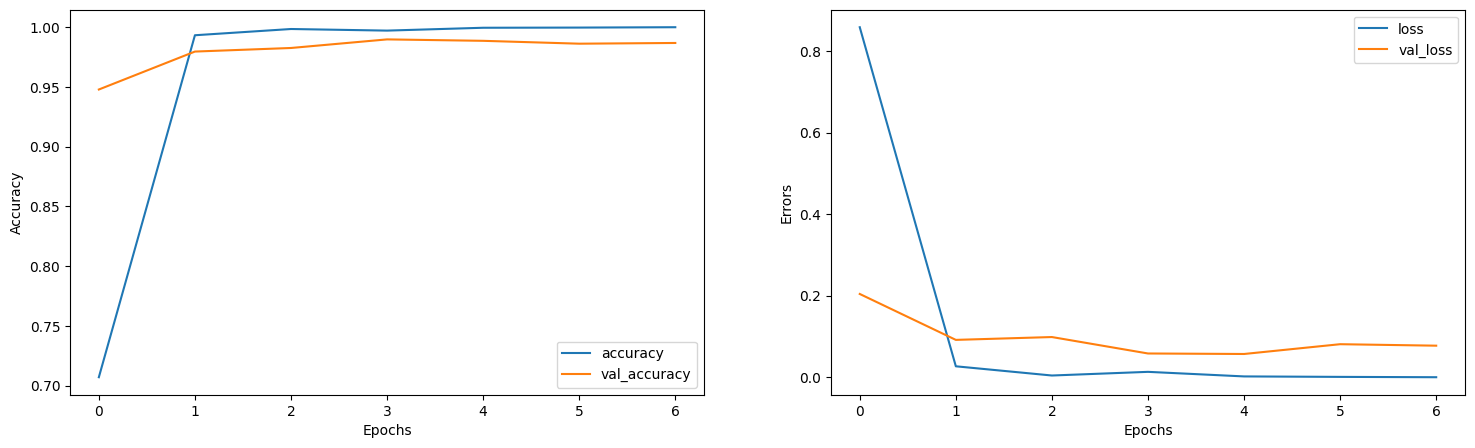

In [12]:
loss_plotter = plt.figure(figsize=(18,5))
mse_plot  = loss_plotter.add_subplot(121)
mse_plot_1  = loss_plotter.add_subplot(122)

mse_plot_1.plot(history.epoch,history.history["loss"],history.history["val_loss"] )
mse_plot_1.set_xlabel("Epochs")
mse_plot_1.set_ylabel('Errors')
mse_plot_1.legend(["loss","val_loss"])


mse_plot.plot(history.epoch,history.history["accuracy"],history.history["val_accuracy"])
mse_plot.set_xlabel("Epochs")
mse_plot.set_ylabel('Accuracy')
mse_plot.legend(["accuracy","val_accuracy"])

## TF Lite

Conversion

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(visual_calculator_model)
converter.optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
tflite_model = converter.convert()

In [14]:
open("vc_model.tflite","wb").write(tflite_model)

39362244

Size Comparison

In [15]:
open("vc_model.tflite","wb").write(tflite_model)
print("Main Model Size :" , round((os.path.getsize("/content/vc_model.h5"))/(1024*1024) ,3 ) , "MB")
print("Lite Model Size :" , round((os.path.getsize("/content/vc_model.tflite"))/(1024*1024),3 ), "MB"  )

Main Model Size : 112.658 MB
Lite Model Size : 37.539 MB


TF Lite Prediction

In [16]:
interpreter = tf.lite.Interpreter('/content/vc_model.tflite')

input_details   = interpreter.get_input_details()
output_details = interpreter.get_output_details()


print(input_details)

print("-"*10)
print(output_details)
print("-"*10)
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

[{'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
[{'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([ 1, 13], dtype=int32), 'shape_signature': array([-1, 13], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
Input Shape: [  1 128 128   1]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 13]
Output Type: <class 'numpy.float32'>


In [17]:
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'] , testing_image)
interpreter.invoke()

tflite_prediction_result = interpreter.get_tensor(output_details[0]['index'])
print("Lite Model Predictions :", labels[np.argmax(tflite_prediction_result)] , "\n" )

Lite Model Predictions : nine 

